Enter 'range' to prune by X value range, or 'average' to average every K rows:  average
Enter the value of K for averaging:  2


Pruned DataFrame:
          X       Y
0    2.9300  0.3105
1   11.5055  0.4060
2   46.8750  0.8505
3  187.5000  2.2810
4  750.0000  2.4020


Generate a new graph? (yes/no):  yes


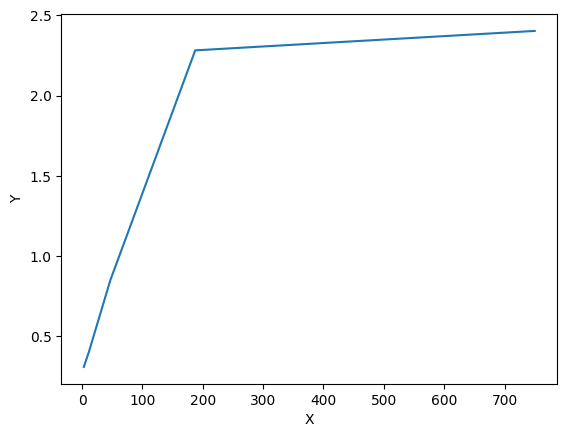

In [2]:
import pandas as pd
import seaborn as sns

# Load the large table
large_table = pd.read_excel("Samuel_Project/sample_input.xlsx")  # Change 'large_table.csv' to your file name

# Function to prune data based on X value range
def prune_by_range(df):
    min_x = float(input("Enter the minimum X value: "))
    max_x = float(input("Enter the maximum X value: "))
    pruned_df = df[(df['X'] >= min_x) & (df['X'] <= max_x)]
    return pruned_df

# Function to prune data by averaging every K rows
def prune_by_average(df, k):
    pruned_df = df.groupby(df.index // k).mean()
    return pruned_df

# Ask the user for pruning method
pruning_method = input("Enter 'range' to prune by X value range, or 'average' to average every K rows: ")

if pruning_method == 'range':
    pruned_df = prune_by_range(large_table)
elif pruning_method == 'average':
    k = int(input("Enter the value of K for averaging: "))
    pruned_df = prune_by_average(large_table, k)
else:
    print("Invalid pruning method specified.")

# Display the pruned dataframe
print("Pruned DataFrame:")
print(pruned_df)

# Ask if the user wants to generate a new graph
generate_graph = input("Generate a new graph? (yes/no): ")

if generate_graph.lower() == 'yes':
    # Plotting using seaborn
    sns.lineplot(data=pruned_df, x='X', y='Y')
